<a href="https://colab.research.google.com/github/Lyndar76/Lynda/blob/main/Lynda_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [36]:
df=pd.read_csv('/content/drive/MyDrive/psd_alldata.csv')
df=df.iloc[:10000]
df.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,20,Beginning Stocks,21,(MT),0.0
1,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,125,Domestic Consumption,21,(MT),0.0
2,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,176,Ending Stocks,21,(MT),0.0
3,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,88,Exports,21,(MT),0.0
4,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,57,Imports,21,(MT),0.0


In [37]:
df.describe()


,Commodity_Code,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Value
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,461854.400000,1999.931400,2004.142600,6.410400,96.272700,17.736000,2.083415e+04
std,228253.044023,16.715222,18.660329,4.715782,58.705528,6.447826,8.446718e+04
min,11000.000000,1960.000000,1960.000000,0.000000,20.000000,5.000000,-5.600000e+01
25%,577400.000000,1989.000000,1989.000000,0.000000,28.000000,21.000000,0.000000e+00
50%,577400.000000,2005.000000,2014.000000,10.000000,88.000000,21.000000,1.608500e+03
75%,577400.000000,2013.000000,2019.000000,10.000000,172.000000,21.000000,1.106075e+04
max,577400.000000,2021.000000,2020.000000,11.000000,221.000000,21.000000,1.574942e+06


In [38]:
df.info()
df.duplicated().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Commodity_Code         10000 non-null  int64  
 1   Commodity_Description  10000 non-null  object 
 2   Country_Code           10000 non-null  object 
 3   Country_Name           10000 non-null  object 
 4   Market_Year            10000 non-null  int64  
 5   Calendar_Year          10000 non-null  int64  
 6   Month                  10000 non-null  int64  
 7   Attribute_ID           10000 non-null  int64  
 8   Attribute_Description  10000 non-null  object 
 9   Unit_ID                10000 non-null  int64  
 10  Unit_Description       10000 non-null  object 
 11  Value                  10000 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 937.6+ KB


,0
Commodity_Code,0
Commodity_Description,0
Country_Code,0
Country_Name,0
Market_Year,0
Calendar_Year,0
Month,0
Attribute_ID,0
Attribute_Description,0
Unit_ID,0


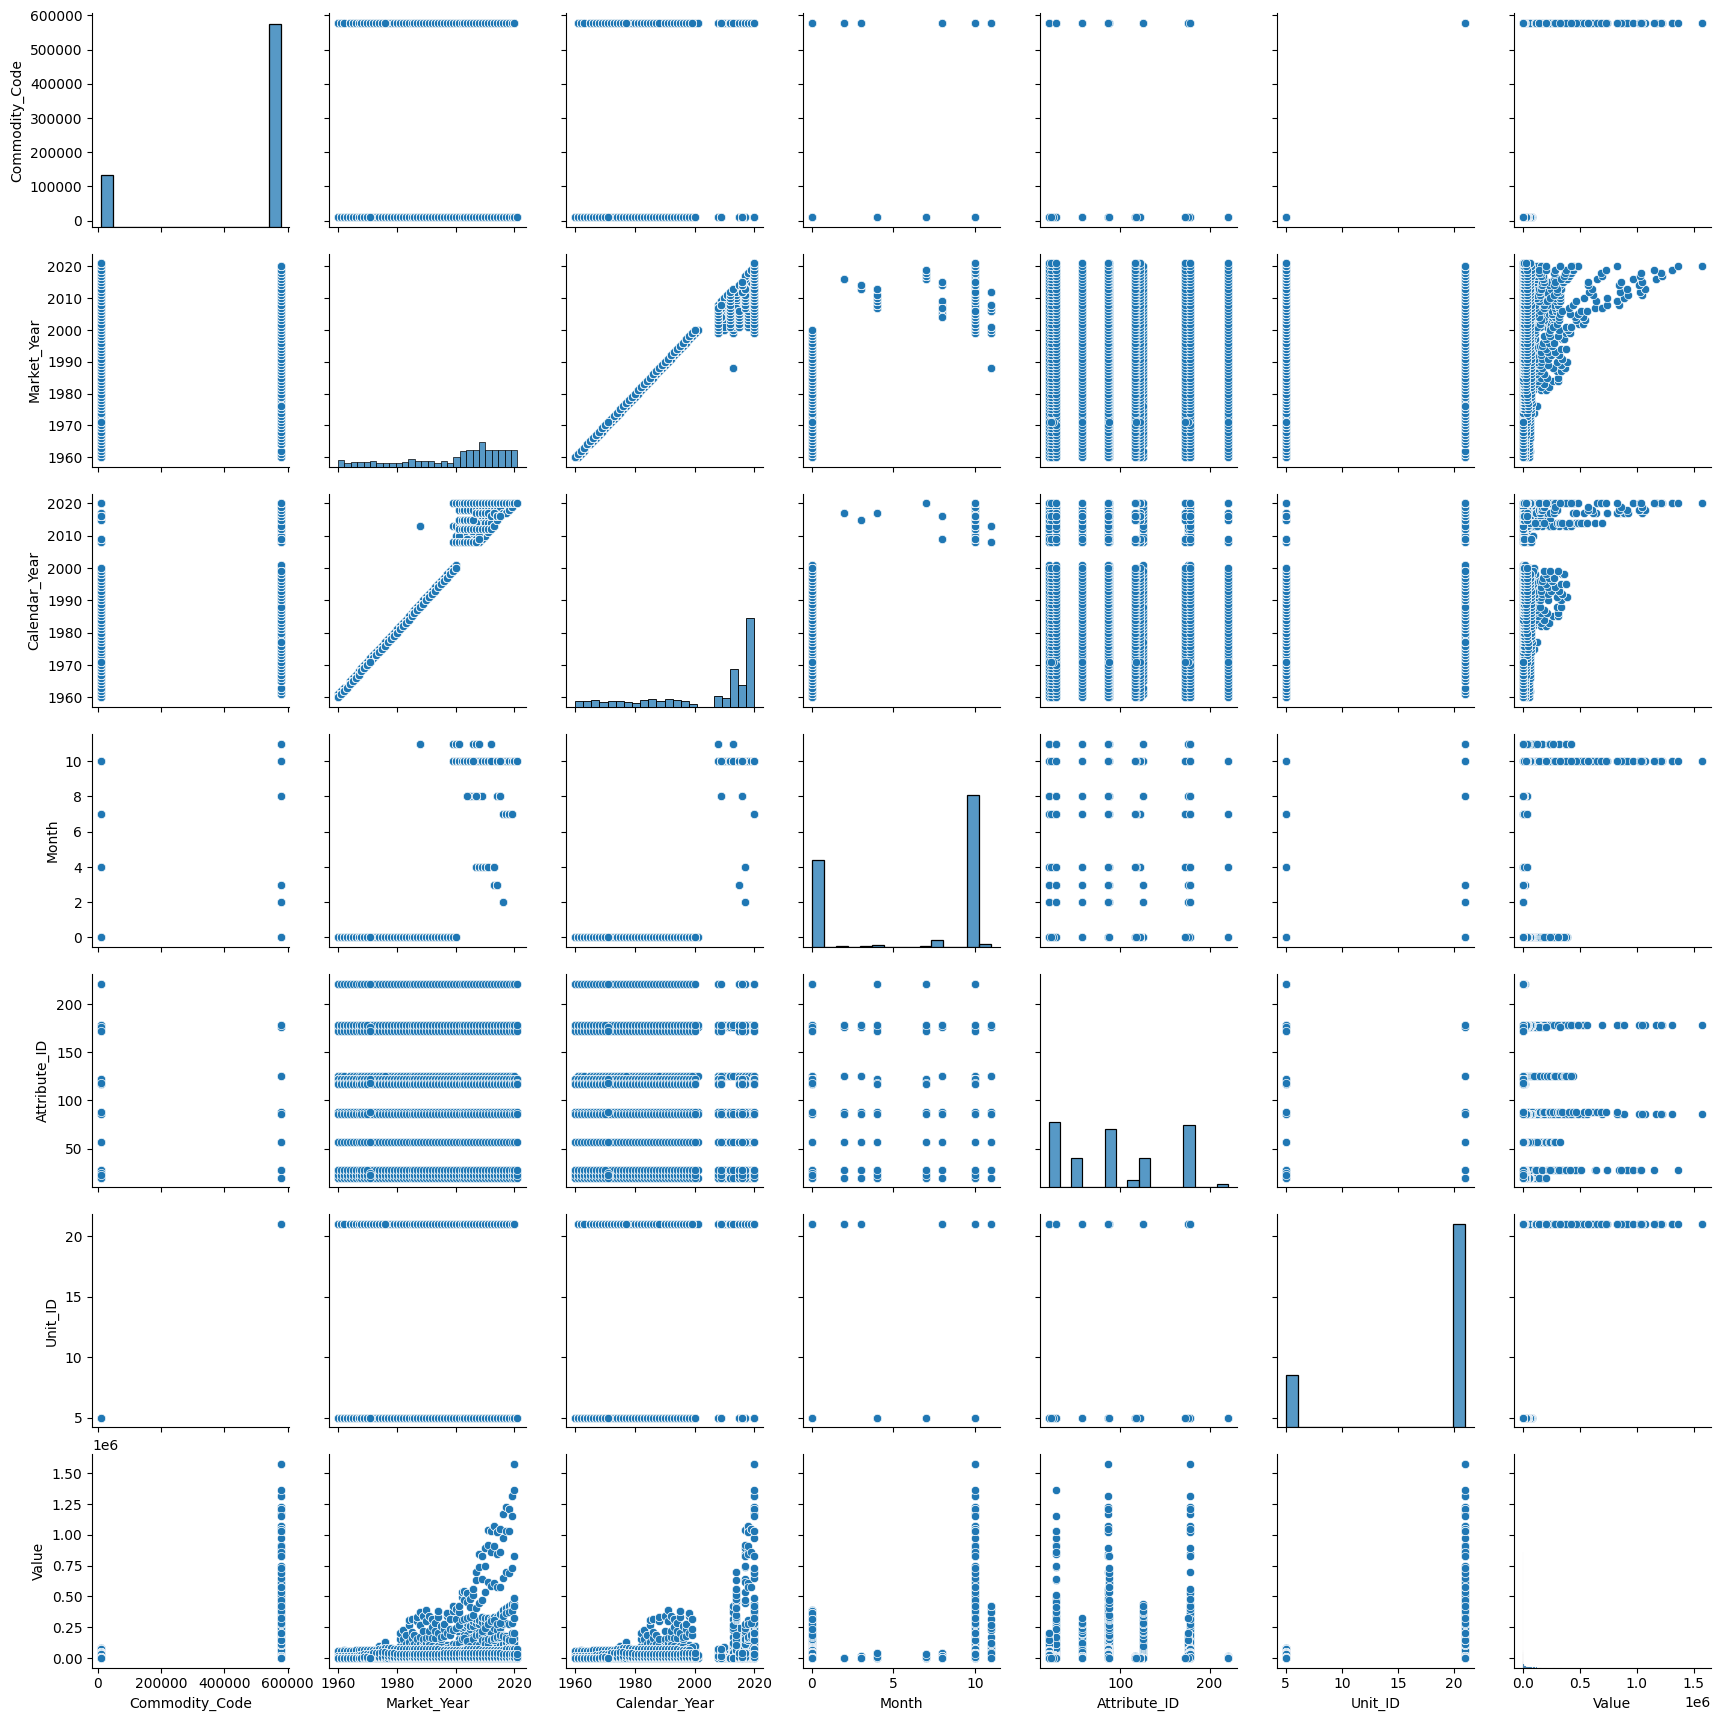

In [39]:
#pair plot
sns.pairplot(df)



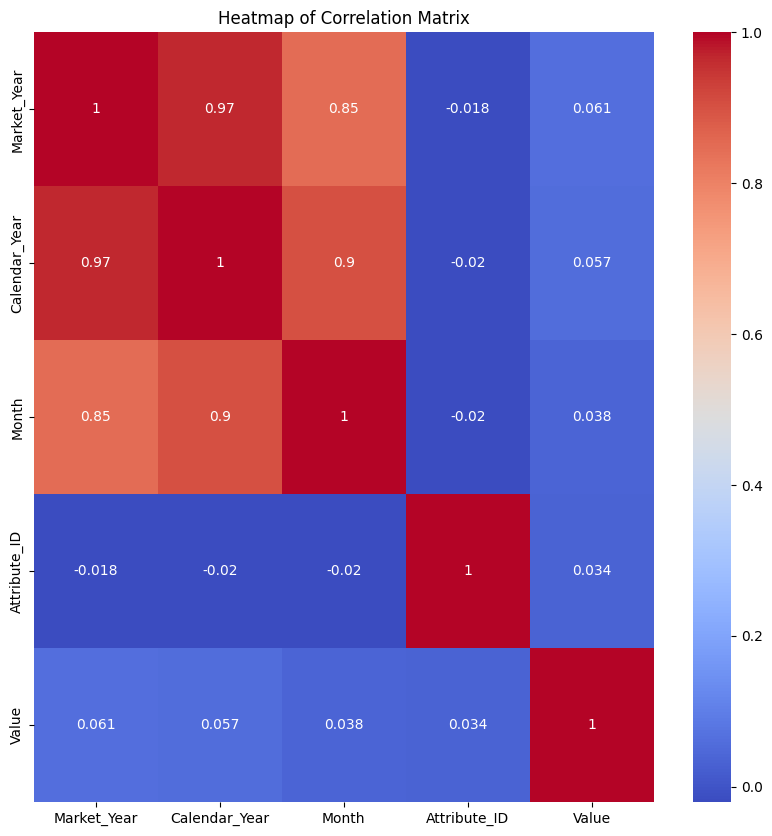

In [40]:
corr=df[['Market_Year', 'Calendar_Year', 'Month', 'Attribute_ID', 'Value']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

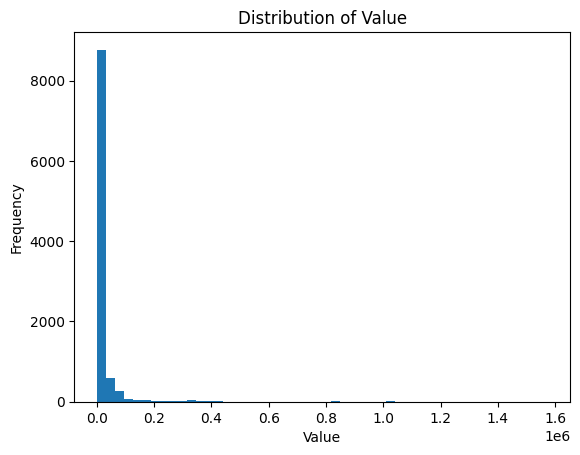

In [41]:
#histoplot frequency of value

plt.hist(df['Value'], bins=50)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


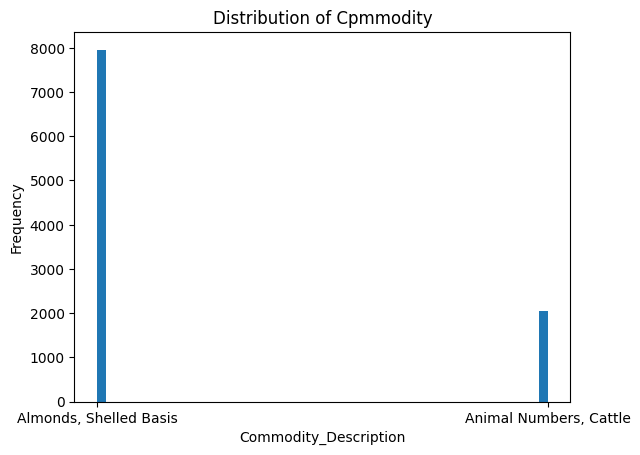

In [42]:
plt.hist(df['Commodity_Description'], bins=50)
plt.title('Distribution of Cpmmodity')
plt.xlabel('Commodity_Description')
plt.ylabel('Frequency')
plt.show()

In [43]:
#train test split

x= df[['Commodity_Description','Country_Name','Market_Year','Attribute_Description']]
y= df['Value']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [44]:
x_cat_train= x_train.select_dtypes('object').columns
x_num_train= x_train.select_dtypes('int').columns

x_cat_test= x_test.select_dtypes('object').columns
x_num_test= x_test.select_dtypes('int').columns

In [45]:
#scaling and encoding our data

scaler= MinMaxScaler(feature_range=(0, 1))
ohe= OneHotEncoder(sparse_output=False, handle_unknown='ignore')

num_tuple=('num', scaler, x_num_train)
cat_tuple=('cat', ohe, x_cat_train)

preprocessor= ColumnTransformer([num_tuple, cat_tuple], verbose_feature_names_out=False)

x_train_transformed= preprocessor.fit_transform(x_train)
x_test_transformed= preprocessor.transform(x_test)

In [46]:
#instatiate the model

model= LinearRegression()
model.fit(x_train_transformed, y_train)

#train the model

y_pred= model.predict(x_test_transformed)

#evaluate the model

mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4630590432.764
R-squared: 0.36402615795881477


In [47]:
#evaluating using gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#define the parameter grid for Ridge regression
ridge_params = {'alpha': [0.1, 1, 10, 100]}  # alpha is the regularization strength

# Initialize Ridge regression with GridSearchCV
ridge = Ridge()
grid_search = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
grid_search.fit(x_train_transformed, y_train)

# Print the best hyperparameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Make predictions with the best model
y_pred = grid_search.best_estimator_.predict(x_test_transformed)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test data:", mse)

Best Parameters: {'alpha': 1}
Best Score: 4450088687.318042
Mean Squared Error on test data: 4628651512.631068


In [48]:
#build using a deep learning linear regression model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
input_shape = (x_train_transformed.shape[1],)  # Assuming x_train_transformed is a 2D array
print(input_shape)

(60,)


In [50]:
# Step 2: Define the Deep Learning Model
model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [52]:
#Training the Model
#Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    x_train_transformed, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7575323136.0000 - mae: 20358.6289 - val_loss: 6359962112.0000 - val_mae: 19290.3945
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5937223680.0000 - mae: 20381.4414 - val_loss: 5895890944.0000 - val_mae: 25589.0566
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6762398208.0000 - mae: 26823.7227 - val_loss: 5630773760.0000 - val_mae: 26726.8008
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6021255680.0000 - mae: 27558.7695 - val_loss: 5301057024.0000 - val_mae: 26072.3223
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5811826688.0000 - mae: 25568.4336 - val_loss: 4896405504.0000 - val_mae: 23507.9844
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6038111744.0000 - mae: 24415.6914 - val_loss: 4423064064.0000 - val_mae: 21532.3516
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5560112640.0000 - mae: 22153.2539 - val_loss: 3991227648.0000 - val_m

In [53]:
#Model evaluation

loss, mae = model.evaluate(x_test_transformed, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 247084576.0000 - mae: 6398.4155
Mean Absolute Error on Test Set: 6483.43115234375


In [54]:
#Making Predictions
predictions = model.predict(x_test_transformed)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


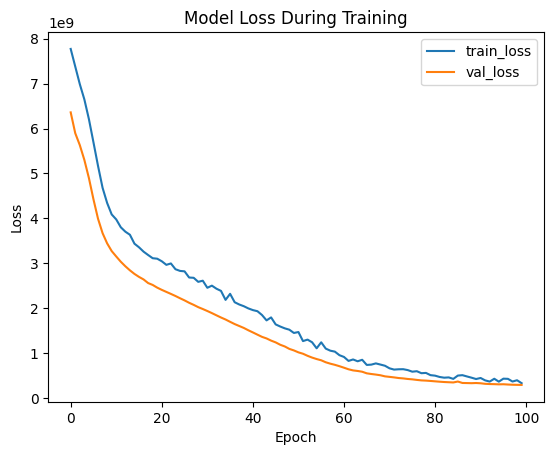

In [55]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss During Training')
plt.show()